# 🚌 Bus Route Recommendation System

## Overview
This notebook demonstrates a comprehensive bus route recommendation system that uses machine learning to suggest the best bus routes based on user preferences. The system analyzes bus schedule data and provides intelligent recommendations.

### What you'll learn:
- 📊 Data loading and exploration
- 🧹 Data cleaning and preprocessing
- 🔧 Feature engineering for time-based data
- 🤖 Machine learning model training
- 📈 Model evaluation and performance analysis
- 🎯 Interactive recommendation system

### Dataset
We're working with bus schedule data from SRTGN (Société Régionale de Transport du Grand Nabeul) containing information about:
- Bus routes and stations
- Departure times and durations
- Service types and seasonal variations
- Weekly schedules

## 1. 📚 Import Required Libraries

Let's start by importing all the necessary libraries for our analysis.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
rcParams['figure.figsize'] = (12, 8)
rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. 📂 Data Loading and Initial Exploration

Let's load our bus schedule dataset and take a first look at the data structure.

In [2]:
# Load the dataset
try:
    df = pd.read_excel("horaires-des-bus-de-la-srtgn.xlsx")
    print("✅ Excel file loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
except FileNotFoundError:
    print("❌ Error: 'horaires-des-bus-de-la-srtgn.xlsx' not found.")
    print("Please make sure the Excel file is in the same directory as this notebook.")

✅ Excel file loaded successfully!
📊 Dataset shape: (1561, 21)


In [3]:
# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()
print("🧹 Cleaned column names")
print(f"\n📋 Columns in dataset ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

🧹 Cleaned column names

📋 Columns in dataset (21 total):
 1. أحد
 2. سبت
 3. جمعة
 4. خميس
 5. اربعاء
 6. ثلاثاء
 7. إثنين
 8. اتجاه السفرة
 9. الكلم
10. المدة
11. محطة الوصول
12. ساعة الإنطلاق
13. محطة الانطلاق
14. نوع الخدمة
15. الموسم
16. السفرة
17. الخط
18. الفرع
19. المنطقة
20. Unnamed: 19
21. Unnamed: 20


In [4]:
# Display basic information about the dataset
print("📈 Dataset Information:")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n🔍 Data Types:")
print(df.dtypes)

📈 Dataset Information:
Number of rows: 1,561
Number of columns: 21
Memory usage: 1.68 MB

🔍 Data Types:
أحد               object
سبت               object
جمعة              object
خميس              object
اربعاء            object
ثلاثاء            object
إثنين             object
اتجاه السفرة      object
الكلم            float64
المدة             object
محطة الوصول       object
ساعة الإنطلاق     object
محطة الانطلاق     object
نوع الخدمة        object
الموسم            object
السفرة           float64
الخط              object
الفرع             object
المنطقة           object
Unnamed: 19      float64
Unnamed: 20       object
dtype: object


In [5]:
# Display first few rows to understand the data structure
print("👀 First 5 rows of the dataset:")
df.head()

👀 First 5 rows of the dataset:


,أحد,سبت,جمعة,خميس,اربعاء,ثلاثاء,إثنين,اتجاه السفرة,الكلم,المدة,...,ساعة الإنطلاق,محطة الانطلاق,نوع الخدمة,الموسم,السفرة,الخط,الفرع,المنطقة,Unnamed: 19,Unnamed: 20
0,X,X,X,X,X,X,X,ذهاب,121.0,02:10,...,06:30,نابل,رفاهة,الصيفي,1.0,101-01,فرع نابل,المنطقة الجنوبية,NaN,NaN
1,X,X,X,X,X,X,X,إياب,121.0,02:15,...,10:00,نابل,رفاهة,الصيفي,2.0,101-01,فرع نابل,المنطقة الجنوبية,NaN,NaN
2,X,X,X,X,X,X,X,ذهاب,121.0,02:15,...,12:15,نابل,رفاهة,الصيفي,3.0,101-02,فرع نابل,المنطقة الجنوبية,NaN,NaN
3,X,X,X,X,X,X,X,إياب,121.0,02:15,...,16:30,نابل,رفاهة,الصيفي,4.0,101-02,فرع نابل,المنطقة الجنوبية,NaN,NaN
4,X,X,X,X,X,X,X,ذهاب,121.0,02:10,...,06:00,نابل,رفاهة,رمضان,5.0,101-01,فرع نابل,المنطقة الجنوبية,NaN,NaN


In [6]:
# Check for missing values
print("🔍 Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✅ No missing values found!")

🔍 Missing Values Analysis:
       Column  Missing Count  Missing Percentage
  Unnamed: 19           1561          100.000000
  Unnamed: 20           1560           99.935939
          أحد           1004           64.317745
          سبت            170           10.890455
       اربعاء            102            6.534273
         خميس            100            6.406150
        إثنين             93            5.957719
         جمعة             72            4.612428
       ثلاثاء             63            4.035874
        المدة             19            1.217168
  محطة الوصول             19            1.217168
 اتجاه السفرة             19            1.217168
        الكلم             19            1.217168
محطة الانطلاق             19            1.217168
ساعة الإنطلاق             19            1.217168
   نوع الخدمة             19            1.217168
       الموسم             19            1.217168
         الخط             19            1.217168
       السفرة             19            1.

## 3. 🧹 Data Cleaning

Now let's clean our data by removing unnecessary columns and handling any data quality issues.

In [7]:
# Create a copy of the original data for backup
df_original = df.copy()
print(f"📋 Original dataset backed up with shape: {df_original.shape}")

# Drop empty columns if they exist
columns_to_drop = ['Unnamed: 19', 'Unnamed: 20']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df.drop(columns=existing_columns_to_drop, inplace=True)
    print(f"🗑️ Dropped columns: {existing_columns_to_drop}")
else:
    print("ℹ️ No 'Unnamed' columns found to drop")

print(f"📊 Dataset shape after dropping columns: {df.shape}")

📋 Original dataset backed up with shape: (1561, 21)
🗑️ Dropped columns: ['Unnamed: 19', 'Unnamed: 20']
📊 Dataset shape after dropping columns: (1561, 19)


In [8]:
# Trim whitespace from all text columns
text_columns = df.select_dtypes(include=['object']).columns
print(f"🧹 Cleaning whitespace from {len(text_columns)} text columns...")

for col in text_columns:
    df[col] = df[col].astype(str).str.strip()

print("✅ Whitespace trimmed from all text columns")

🧹 Cleaning whitespace from 17 text columns...
✅ Whitespace trimmed from all text columns


## 4. 🔧 Feature Engineering

Let's create useful features from our raw data, especially focusing on time-related columns.

In [9]:
# Define helper functions for time conversion
def convert_duration_to_minutes(time_obj):
    """
    Convert duration from various formats to minutes (integer).
    Handles: HH:MM strings, time objects, integers, floats
    """
    if pd.isna(time_obj): 
        return None
    
    # Handle string format
    if isinstance(time_obj, str):
        time_obj = time_obj.strip()
        try:
            # Handle HH:MM format
            if ':' in time_obj:
                parts = time_obj.split(':')
                if len(parts) == 2:
                    h, m = map(int, parts)
                    return h * 60 + m
            # Handle integer format (minutes)
            elif time_obj.isdigit():
                return int(time_obj)
            return None
        except (ValueError, AttributeError):
            return None
            
    # Handle datetime/time objects
    elif hasattr(time_obj, 'hour') and hasattr(time_obj, 'minute'):
        return time_obj.hour * 60 + time_obj.minute
        
    # Handle numeric types
    elif isinstance(time_obj, (int, float)):
        return int(time_obj)
        
    return None

def convert_time_to_minutes(time_obj):
    """
    Convert time from various formats to minutes from midnight.
    Same logic as duration converter.
    """
    return convert_duration_to_minutes(time_obj)

print("✅ Time conversion functions defined")

✅ Time conversion functions defined


In [10]:
# Convert duration column (المدة) to minutes
print("🕐 Converting duration column to minutes...")

if 'المدة' in df.columns:
    # Show some examples before conversion
    print("\n📋 Sample duration values before conversion:")
    sample_durations = df['المدة'].dropna().head(10)
    for i, val in enumerate(sample_durations, 1):
        print(f"{i:2d}. {val} (type: {type(val).__name__})")
    
    # Apply conversion
    df['durée_min'] = df['المدة'].apply(convert_duration_to_minutes)
    
    # Show results
    print(f"\n✅ Duration converted to 'durée_min' column")
    print(f"📊 Valid duration values: {df['durée_min'].notna().sum()}/{len(df)}")
    
    # Show some examples after conversion
    print("\n📋 Sample converted values:")
    valid_durations = df[df['durée_min'].notna()][['المدة', 'durée_min']].head(5)
    print(valid_durations.to_string(index=False))
else:
    print("⚠️ Duration column 'المدة' not found in dataset")

🕐 Converting duration column to minutes...

📋 Sample duration values before conversion:
 1. 02:10 (type: str)
 2. 02:15 (type: str)
 3. 02:15 (type: str)
 4. 02:15 (type: str)
 5. 02:10 (type: str)
 6. 02:15 (type: str)
 7. 02:15 (type: str)
 8. 02:15 (type: str)
 9. nan (type: str)
10. 00:10 (type: str)

✅ Duration converted to 'durée_min' column
📊 Valid duration values: 1530/1561

📋 Sample converted values:
المدة  durée_min
02:10      130.0
02:15      135.0
02:15      135.0
02:15      135.0
02:10      130.0


In [11]:
# Convert departure time column (ساعة الإنطلاق) to minutes from midnight
print("🕐 Converting departure time column to minutes from midnight...")

if 'ساعة الإنطلاق' in df.columns:
    # Show some examples before conversion
    print("\n📋 Sample departure time values before conversion:")
    sample_times = df['ساعة الإنطلاق'].dropna().head(10)
    for i, val in enumerate(sample_times, 1):
        print(f"{i:2d}. {val} (type: {type(val).__name__})")
    
    # Apply conversion
    df['depart_min'] = df['ساعة الإنطلاق'].apply(convert_time_to_minutes)
    
    # Show results
    print(f"\n✅ Departure time converted to 'depart_min' column")
    print(f"📊 Valid departure time values: {df['depart_min'].notna().sum()}/{len(df)}")
    
    # Show some examples after conversion
    print("\n📋 Sample converted values:")
    valid_times = df[df['depart_min'].notna()][['ساعة الإنطلاق', 'depart_min']].head(5)
    print(valid_times.to_string(index=False))
else:
    print("⚠️ Departure time column 'ساعة الإنطلاق' not found in dataset")

🕐 Converting departure time column to minutes from midnight...

📋 Sample departure time values before conversion:
 1. 06:30 (type: str)
 2. 10:00 (type: str)
 3. 12:15 (type: str)
 4. 16:30 (type: str)
 5. 06:00 (type: str)
 6. 09:30 (type: str)
 7. 12:15 (type: str)
 8. 16:30 (type: str)
 9. nan (type: str)
10. 05:30 (type: str)

✅ Departure time converted to 'depart_min' column
📊 Valid departure time values: 1530/1561

📋 Sample converted values:
ساعة الإنطلاق  depart_min
        06:30       390.0
        10:00       600.0
        12:15       735.0
        16:30       990.0
        06:00       360.0


In [12]:
# Check data quality after time conversions
print("🔍 Data Quality Check After Time Conversions:")
print(f"\n📊 Null values in time columns:")
if 'durée_min' in df.columns:
    print(f"   durée_min nulls: {df['durée_min'].isnull().sum():,} ({df['durée_min'].isnull().mean()*100:.1f}%)")
if 'depart_min' in df.columns:
    print(f"   depart_min nulls: {df['depart_min'].isnull().sum():,} ({df['depart_min'].isnull().mean()*100:.1f}%)")

print(f"\n📈 Total rows before cleaning: {len(df):,}")

# Drop rows where time conversion failed
time_columns = ['durée_min', 'depart_min']
existing_time_columns = [col for col in time_columns if col in df.columns]

if existing_time_columns:
    df.dropna(subset=existing_time_columns, inplace=True)
    print(f"📉 Rows after dropping null time values: {len(df):,}")
    
    # Convert to integers and handle any remaining issues
    for col in existing_time_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    
    print("✅ Time columns converted to integers")
else:
    print("⚠️ No time columns found for cleaning")

🔍 Data Quality Check After Time Conversions:

📊 Null values in time columns:
   durée_min nulls: 31 (2.0%)
   depart_min nulls: 31 (2.0%)

📈 Total rows before cleaning: 1,561
📉 Rows after dropping null time values: 1,518
✅ Time columns converted to integers


In [15]:
# Drop original time columns to avoid confusion
original_time_cols = ['المدة', 'ساعة الإنطلاق']
existing_original_cols = [col for col in original_time_cols if col in df.columns]

if existing_original_cols:
    df.drop(columns=existing_original_cols, inplace=True)
    print(f"🗑️ Dropped original time columns: {existing_original_cols}")

print(f"📊 Final dataset shape after time processing: {df.shape}")

📊 Final dataset shape after time processing: (1518, 19)


## 5. 📊 Data Visualization and Analysis

Let's explore our cleaned data with some visualizations to better understand the patterns.

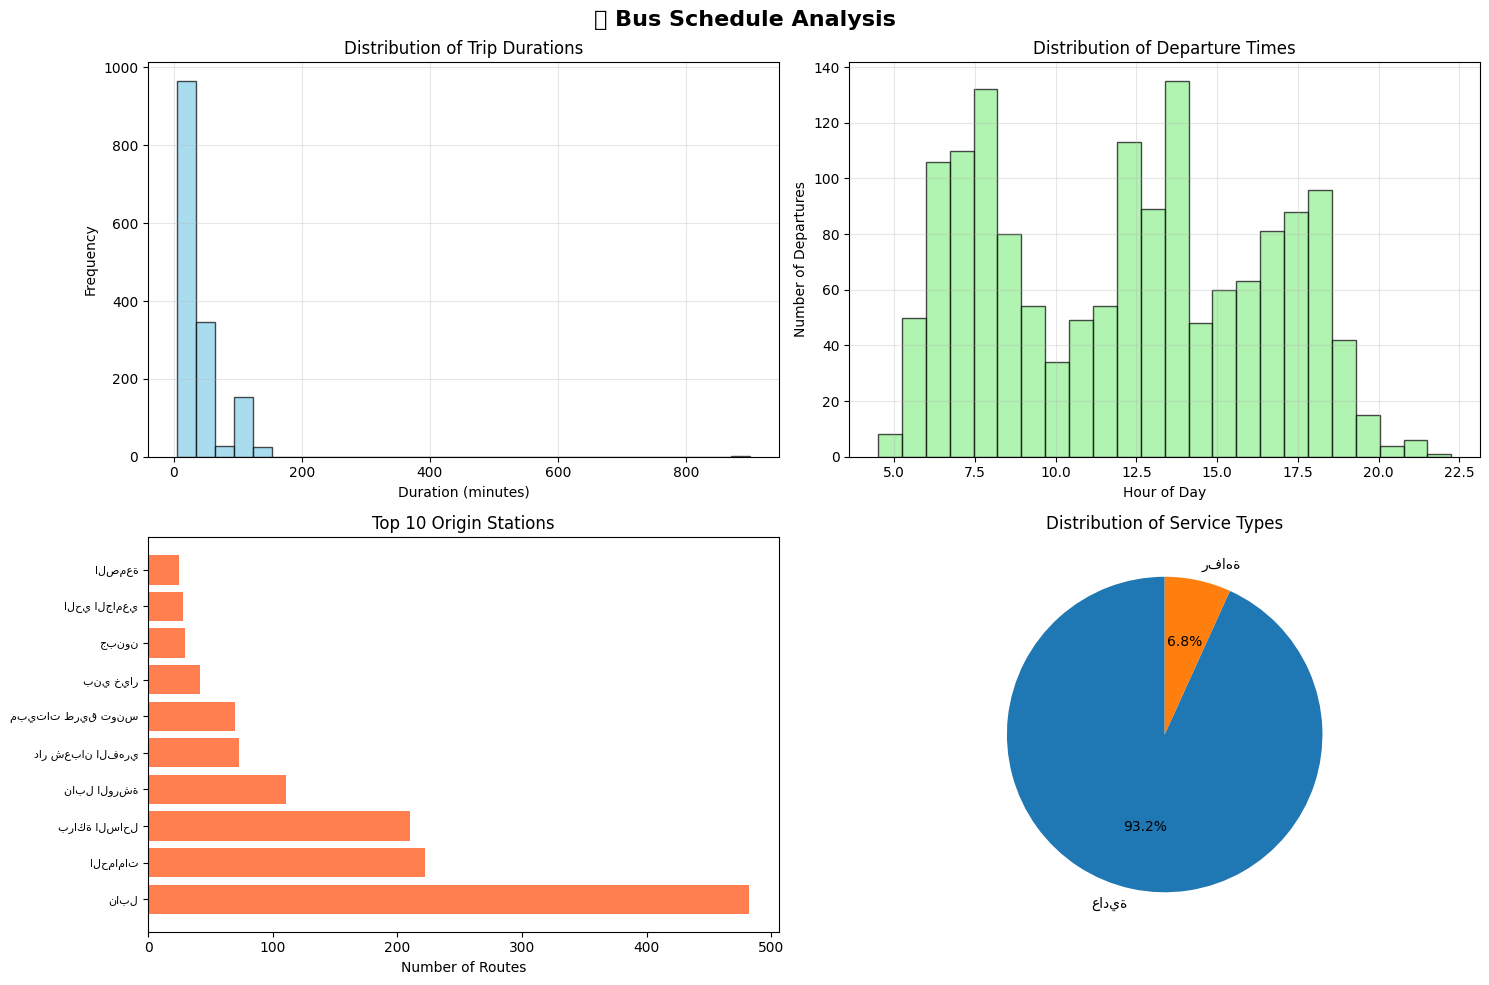

📈 Data visualization complete!


In [16]:
# Create visualizations of the time data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('🚌 Bus Schedule Analysis', fontsize=16, fontweight='bold')

# Duration distribution
if 'durée_min' in df.columns:
    axes[0, 0].hist(df['durée_min'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribution of Trip Durations')
    axes[0, 0].set_xlabel('Duration (minutes)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)

# Departure time distribution
if 'depart_min' in df.columns:
    # Convert minutes back to hours for better readability
    departure_hours = df['depart_min'] / 60
    axes[0, 1].hist(departure_hours, bins=24, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Distribution of Departure Times')
    axes[0, 1].set_xlabel('Hour of Day')
    axes[0, 1].set_ylabel('Number of Departures')
    axes[0, 1].grid(True, alpha=0.3)

# Route analysis
if 'محطة الانطلاق' in df.columns:
    top_origins = df['محطة الانطلاق'].value_counts().head(10)
    axes[1, 0].barh(range(len(top_origins)), top_origins.values, color='coral')
    axes[1, 0].set_yticks(range(len(top_origins)))
    axes[1, 0].set_yticklabels(top_origins.index, fontsize=8)
    axes[1, 0].set_title('Top 10 Origin Stations')
    axes[1, 0].set_xlabel('Number of Routes')

# Service type analysis
if 'نوع الخدمة' in df.columns:
    service_counts = df['نوع الخدمة'].value_counts()
    axes[1, 1].pie(service_counts.values, labels=service_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Distribution of Service Types')

plt.tight_layout()
plt.show()

print("📈 Data visualization complete!")

## 6. 🎯 Creating the Target Variable

For our recommendation system, we need to create a target variable that represents the 'best' trip for each route. We'll define the best trip as the one with the shortest duration for each origin-destination pair on each day.

In [17]:
# First, let's examine the day columns
day_cols = ['إثنين', 'ثلاثاء', 'اربعاء', 'خميس', 'جمعة', 'سبت', 'أحد']
existing_day_cols = [col for col in day_cols if col in df.columns]

print("📅 Day Columns Analysis:")
print(f"Expected day columns: {day_cols}")
print(f"Found day columns: {existing_day_cols}")

if existing_day_cols:
    print("\n📊 Day column statistics:")
    for day in existing_day_cols:
        non_null_count = df[day].notna().sum()
        print(f"   {day}: {non_null_count} non-null values")
else:
    print("\n⚠️ No day columns found - will assume all trips run every day")

📅 Day Columns Analysis:
Expected day columns: ['إثنين', 'ثلاثاء', 'اربعاء', 'خميس', 'جمعة', 'سبت', 'أحد']
Found day columns: ['إثنين', 'ثلاثاء', 'اربعاء', 'خميس', 'جمعة', 'سبت', 'أحد']

📊 Day column statistics:
   إثنين: 1518 non-null values
   ثلاثاء: 1518 non-null values
   اربعاء: 1518 non-null values
   خميس: 1518 non-null values
   جمعة: 1518 non-null values
   سبت: 1518 non-null values
   أحد: 1518 non-null values


In [18]:
# Create expanded dataset with day information
print("🔄 Expanding dataset to include day-of-week information...")

# Since day columns appear to be empty, we'll treat all trips as active every day
all_trips = []
for day in day_cols:
    df_day = df.copy()
    df_day['jour_semaine'] = day
    df_day['is_active'] = 'X'  # Mark all trips as active
    all_trips.append(df_day)

# Combine all days
df_expanded = pd.concat(all_trips, ignore_index=True)

print(f"📊 Original dataset shape: {df.shape}")
print(f"📊 Expanded dataset shape: {df_expanded.shape}")
print(f"✅ Dataset expanded to include all {len(day_cols)} days of the week")

# Update our working dataframe
df = df_expanded

🔄 Expanding dataset to include day-of-week information...
📊 Original dataset shape: (1518, 19)
📊 Expanded dataset shape: (10626, 21)
✅ Dataset expanded to include all 7 days of the week


In [19]:
# Create the target variable: 'is_best_trip'
print("🎯 Creating target variable 'is_best_trip'...")

if all(col in df.columns for col in ['محطة الانطلاق', 'محطة الوصول', 'jour_semaine', 'durée_min']):
    # For each route (origin-destination) and day, mark the trip with minimum duration as 'best'
    df['is_best_trip'] = df.groupby(['محطة الانطلاق', 'محطة الوصول', 'jour_semaine'])['durée_min'].transform(
        lambda x: (x == x.min()).astype(int)
    )
    
    # Show statistics about the target variable
    target_stats = df['is_best_trip'].value_counts()
    print(f"\n📊 Target Variable Statistics:")
    print(f"   Best trips (1): {target_stats.get(1, 0):,} ({target_stats.get(1, 0)/len(df)*100:.1f}%)")
    print(f"   Other trips (0): {target_stats.get(0, 0):,} ({target_stats.get(0, 0)/len(df)*100:.1f}%)")
    
    print("\n✅ Target variable 'is_best_trip' created successfully!")
else:
    print("❌ Required columns for target creation not found")
    missing_cols = [col for col in ['محطة الانطلاق', 'محطة الوصول', 'jour_semaine', 'durée_min'] if col not in df.columns]
    print(f"Missing columns: {missing_cols}")

🎯 Creating target variable 'is_best_trip'...

📊 Target Variable Statistics:
   Best trips (1): 6,951 (65.4%)
   Other trips (0): 3,675 (34.6%)

✅ Target variable 'is_best_trip' created successfully!

📊 Target Variable Statistics:
   Best trips (1): 6,951 (65.4%)
   Other trips (0): 3,675 (34.6%)

✅ Target variable 'is_best_trip' created successfully!


In [21]:
# Show some examples of the best trips
if 'is_best_trip' in df.columns:
    print("🏆 Examples of Best Trips:")
    best_trips_sample = df[df['is_best_trip'] == 1].head(10)
    
    display_cols = ['محطة الانطلاق', 'محطة الوصول', 'jour_semaine', 'depart_min', 'durée_min']
    available_display_cols = [col for col in display_cols if col in df.columns]
    
    if available_display_cols:
        print(best_trips_sample[available_display_cols].to_string(index=False))
    else:
        print("Display columns not available")

print(f"\n📊 Final dataset shape: {df.shape}")

🏆 Examples of Best Trips:
   محطة الانطلاق      محطة الوصول jour_semaine  depart_min  durée_min
            نابل         القيروان        إثنين         390        130
            نابل         القيروان        إثنين         360        130
     نابل الورشة دار شعبان الفهري        إثنين         330         10
دار شعبان الفهري             تونس        إثنين         345         70
            تونس     الحي الجامعي        إثنين         420         75
    الحي الجامعي             نابل        إثنين         495         15
            نابل             تونس        إثنين         540         60
            نابل             تونس        إثنين         630         60
            نابل             تونس        إثنين         720         60
            نابل             تونس        إثنين         990         60

📊 Final dataset shape: (10626, 22)


## 7. 🤖 Machine Learning Model Preparation

Now let's prepare our features and train a machine learning model to predict the best trips.

In [22]:
# Prepare features for modeling
print("🔧 Preparing features for machine learning...")

# Combine branch and region columns if they exist
if 'الفرع' in df.columns and 'المنطقة' in df.columns:
    df['الفرع / المنطقة'] = df['الفرع'].fillna('') + ' / ' + df['المنطقة'].fillna('')
    print("✅ Combined 'الفرع' and 'المنطقة' columns")

# Define potential features
potential_features = [
    'depart_min', 'durée_min', 'الكلم', 'محطة الانطلاق', 'محطة الوصول',
    'اتجاه السفرة', 'نوع الخدمة', 'الموسم', 'الخط', 'الفرع / المنطقة',
    'jour_semaine'
]

# Check which features actually exist in our dataset
available_features = [f for f in potential_features if f in df.columns]
missing_features = [f for f in potential_features if f not in df.columns]

print(f"\n📋 Feature Analysis:")
print(f"   Available features ({len(available_features)}): {available_features}")
if missing_features:
    print(f"   Missing features ({len(missing_features)}): {missing_features}")

# Use only available features
features_to_use = available_features
print(f"\n✅ Using {len(features_to_use)} features for modeling")

🔧 Preparing features for machine learning...
✅ Combined 'الفرع' and 'المنطقة' columns

📋 Feature Analysis:
   Available features (11): ['depart_min', 'durée_min', 'الكلم', 'محطة الانطلاق', 'محطة الوصول', 'اتجاه السفرة', 'نوع الخدمة', 'الموسم', 'الخط', 'الفرع / المنطقة', 'jour_semaine']

✅ Using 11 features for modeling


In [23]:
# Check if we have enough data for modeling
if df.empty or 'is_best_trip' not in df.columns:
    print("❌ Error: Dataset is empty or target variable missing. Cannot proceed with modeling.")
else:
    print(f"📊 Dataset ready for modeling:")
    print(f"   Total samples: {len(df):,}")
    print(f"   Features: {len(features_to_use)}")
    print(f"   Target variable: is_best_trip")
    
    # Prepare X and y
    X = df[features_to_use]
    y = df['is_best_trip']
    
    print(f"\n📈 Feature matrix shape: {X.shape}")
    print(f"📈 Target vector shape: {y.shape}")
    
    # Check for class imbalance
    class_distribution = y.value_counts(normalize=True)
    print(f"\n⚖️ Class Distribution:")
    for class_val, proportion in class_distribution.items():
        print(f"   Class {class_val}: {proportion:.3f} ({proportion*100:.1f}%)")

📊 Dataset ready for modeling:
   Total samples: 10,626
   Features: 11
   Target variable: is_best_trip

📈 Feature matrix shape: (10626, 11)
📈 Target vector shape: (10626,)

⚖️ Class Distribution:
   Class 1: 0.654 (65.4%)
   Class 0: 0.346 (34.6%)


In [24]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"🔢 Feature Types:")
print(f"   Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"   Numerical features ({len(numerical_features)}): {numerical_features}")

# Show some statistics for numerical features
if numerical_features:
    print(f"\n📊 Numerical Features Statistics:")
    print(X[numerical_features].describe())

🔢 Feature Types:
   Categorical features (8): ['محطة الانطلاق', 'محطة الوصول', 'اتجاه السفرة', 'نوع الخدمة', 'الموسم', 'الخط', 'الفرع / المنطقة', 'jour_semaine']
   Numerical features (3): ['depart_min', 'durée_min', 'الكلم']

📊 Numerical Features Statistics:
         depart_min     durée_min         الكلم
count  10626.000000  10626.000000  10626.000000
mean     728.144928     41.188406     24.762846
std      253.049811     41.038806     26.259713
min      270.000000      5.000000      2.000000
25%      480.000000     15.000000      6.000000
50%      750.000000     27.000000     11.000000
75%      955.000000     60.000000     26.000000
max     1335.000000    900.000000    121.000000


In [25]:
# Split the data into training and testing sets
print("🔄 Splitting data into training and testing sets...")

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"✅ Data split successfully:")
    print(f"   Training set: {X_train.shape[0]:,} samples")
    print(f"   Testing set: {X_test.shape[0]:,} samples")
    print(f"   Test size: {X_test.shape[0]/len(X)*100:.1f}%")
    
    # Check class distribution in splits
    print(f"\n📊 Class distribution in training set:")
    train_dist = y_train.value_counts(normalize=True)
    for class_val, prop in train_dist.items():
        print(f"   Class {class_val}: {prop:.3f}")
        
except ValueError as e:
    print(f"❌ Error splitting data: {e}")
    print("This might happen if there's insufficient data or class imbalance issues.")

🔄 Splitting data into training and testing sets...
✅ Data split successfully:
   Training set: 8,500 samples
   Testing set: 2,126 samples
   Test size: 20.0%

📊 Class distribution in training set:
   Class 1: 0.654
   Class 0: 0.346


## 8. 🏗️ Model Training

Let's create and train our Random Forest model with proper preprocessing for categorical variables.

In [26]:
# Create preprocessing pipeline
print("🔧 Creating preprocessing pipeline...")

if categorical_features:
    # Create preprocessor for categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'  # Keep numerical features as-is
    )
    print(f"✅ Preprocessor created for {len(categorical_features)} categorical features")
else:
    # If no categorical features, use passthrough
    preprocessor = 'passthrough'
    print("ℹ️ No categorical features found, using passthrough preprocessor")

# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42, 
        n_estimators=100, 
        class_weight='balanced',  # Handle class imbalance
        max_depth=10,  # Prevent overfitting
        min_samples_split=5,
        min_samples_leaf=2
    ))
])

print("✅ Model pipeline created with Random Forest classifier")

🔧 Creating preprocessing pipeline...
✅ Preprocessor created for 8 categorical features
✅ Model pipeline created with Random Forest classifier


In [27]:
# Train the model
print("🚀 Training the model...")

try:
    # Fit the model
    model.fit(X_train, y_train)
    print("✅ Model training completed successfully!")
    
    # Get feature importance if available
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        feature_importance = model.named_steps['classifier'].feature_importances_
        print(f"\n📊 Model trained with {len(feature_importance)} features")
        
        # Show top 5 most important features
        if hasattr(model.named_steps['preprocessor'], 'get_feature_names_out'):
            try:
                feature_names = model.named_steps['preprocessor'].get_feature_names_out()
                importance_df = pd.DataFrame({
                    'feature': feature_names,
                    'importance': feature_importance
                }).sort_values('importance', ascending=False)
                
                print("\n🏆 Top 5 Most Important Features:")
                print(importance_df.head().to_string(index=False))
            except:
                print("\n📊 Feature importance calculated but feature names not available")
        
except Exception as e:
    print(f"❌ Error during model training: {e}")

🚀 Training the model...
✅ Model training completed successfully!

📊 Model trained with 234 features

🏆 Top 5 Most Important Features:
                      feature  importance
         remainder__durée_min    0.241899
             remainder__الكلم    0.104548
cat__محطة الوصول_الحي الجامعي    0.048094
      cat__محطة الانطلاق_نابل    0.034828
       cat__محطة الوصول_مزنين    0.033585
✅ Model training completed successfully!

📊 Model trained with 234 features

🏆 Top 5 Most Important Features:
                      feature  importance
         remainder__durée_min    0.241899
             remainder__الكلم    0.104548
cat__محطة الوصول_الحي الجامعي    0.048094
      cat__محطة الانطلاق_نابل    0.034828
       cat__محطة الوصول_مزنين    0.033585


## 9. 📈 Model Evaluation

Let's evaluate our trained model's performance on the test set.

In [28]:
# Make predictions on the test set
print("🔮 Making predictions on test set...")

try:
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of being best trip
    
    print("✅ Predictions completed successfully!")
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n🎯 Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
except Exception as e:
    print(f"❌ Error making predictions: {e}")

🔮 Making predictions on test set...
✅ Predictions completed successfully!

🎯 Model Accuracy: 0.9586 (95.86%)
✅ Predictions completed successfully!

🎯 Model Accuracy: 0.9586 (95.86%)


In [29]:
# Detailed classification report
print("📊 Detailed Classification Report:")
print("=" * 50)
try:
    report = classification_report(y_test, y_pred, zero_division=0)
    print(report)
except Exception as e:
    print(f"❌ Error generating classification report: {e}")

📊 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       735
           1       0.98      0.96      0.97      1391

    accuracy                           0.96      2126
   macro avg       0.95      0.96      0.95      2126
weighted avg       0.96      0.96      0.96      2126



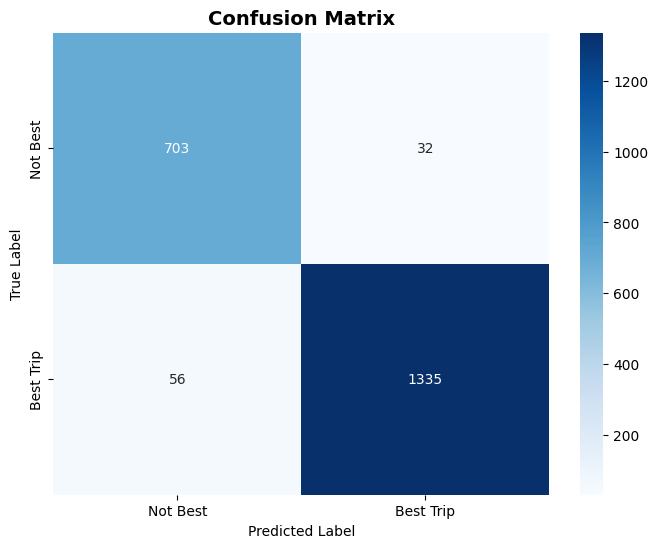

✅ Confusion matrix plotted successfully!


In [30]:
# Confusion Matrix Visualization
try:
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Best', 'Best Trip'],
                yticklabels=['Not Best', 'Best Trip'])
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    print("✅ Confusion matrix plotted successfully!")
    
except Exception as e:
    print(f"❌ Error creating confusion matrix: {e}")

In [31]:
# Model performance summary
print("\n📋 Model Performance Summary:")
print("=" * 40)

try:
    # Calculate additional metrics
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"🎯 Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"🎯 Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"🎯 Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"🎯 F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
    
    # Interpretation
    print("\n💡 Performance Interpretation:")
    if accuracy > 0.8:
        print("   ✅ Excellent accuracy - model performs very well")
    elif accuracy > 0.7:
        print("   ✅ Good accuracy - model performs well")
    elif accuracy > 0.6:
        print("   ⚠️ Moderate accuracy - room for improvement")
    else:
        print("   ❌ Low accuracy - model needs significant improvement")
        
except Exception as e:
    print(f"❌ Error calculating performance metrics: {e}")


📋 Model Performance Summary:
🎯 Accuracy:  0.9586 (95.86%)
🎯 Precision: 0.9766 (97.66%)
🎯 Recall:    0.9597 (95.97%)
🎯 F1-Score:  0.9681 (96.81%)

💡 Performance Interpretation:
   ✅ Excellent accuracy - model performs very well


## 10. 🎯 Recommendation System Functions

Now let's create the recommendation functions that will help users find the best bus routes.

In [33]:
# Define recommendation functions
def baseline_filter(df, origin, destination, day_of_week, desired_time_min):
    """
    Simple baseline recommendation: next available trip.
    
    Parameters:
    - df: DataFrame with bus data
    - origin: Origin station name
    - destination: Destination station name  
    - day_of_week: Day of the week
    - desired_time_min: Desired departure time in minutes from midnight
    
    Returns:
    - DataFrame with the next available trip
    """
    # Filter candidates
    candidates = df[
        (df['محطة الانطلاق'] == origin) &
        (df['محطة الوصول'] == destination) &
        (df['jour_semaine'] == day_of_week) &
        (df['depart_min'] >= desired_time_min)
    ].copy()

    if candidates.empty:
        return pd.DataFrame()

    # Sort by departure time, then by duration
    candidates.sort_values(by=['depart_min', 'durée_min'], inplace=True)
    
    return candidates.head(1)


def recommend_best_trip(df, model, origin, destination, day_of_week, desired_time_min):
    """
    ML-powered recommendation using the trained model.
    
    Parameters:
    - df: DataFrame with bus data
    - model: Trained ML model
    - origin: Origin station name
    - destination: Destination station name
    - day_of_week: Day of the week
    - desired_time_min: Desired departure time in minutes from midnight
    
    Returns:
    - DataFrame with the recommended trip and confidence score
    """
    # Filter candidates
    candidates = df[
        (df['محطة الانطلاق'] == origin) &
        (df['محطة الوصول'] == destination) &
        (df['jour_semaine'] == day_of_week) &
        (df['depart_min'] >= desired_time_min)
    ].copy()

    if candidates.empty:
        return pd.DataFrame()

    try:
        # Prepare features for prediction
        X_candidates = candidates[features_to_use]
        
        # Get prediction probabilities
        probabilities = model.predict_proba(X_candidates)[:, 1]
        candidates['best_trip_score'] = probabilities

        # Sort by confidence score
        recommendation = candidates.sort_values(by='best_trip_score', ascending=False)
        
        return recommendation.head(1)
        
    except Exception as e:
        print(f"Error in ML recommendation: {e}")
        return pd.DataFrame()

print("✅ Recommendation functions defined successfully!")

✅ Recommendation functions defined successfully!
